# Separation of Variables in 3D, waveguide

An infinitely long rectangluar metal pipe (sides $a$ and $b$) is grounded, but one end, at $x=0$ is maintained at a specified potential $V_0(y,z)$. Find the potential inside the pipe

This is a 3D problem and thus:

$$\frac{\partial^2V}{\partial x^2}+\frac{\partial^2V}{\partial y^2}+\frac{\partial^2V}{\partial z^2}=0 \label{eq:1}\tag{1}$$

Boundary conditions (Dirichlet):

1. $V=0$ when $y=0$
2. $V=0$ when $y=a$
3. $V=0$ when $z=0$
4. $V=0$ when $z=b$
5. $V\rightarrow0$ as $x\rightarrow \infty$
3. $V=V_0(y,z)$ when $x=0$

### Separation of variables: as products

$$V(x,y,z)=X(x)Y(y)Z(z)\tag{2}$$

$$\frac 1 X \frac{d^2X}{dx^2}+\frac 1 Y \frac{d^2Y}{dy^2}+\frac 1 Z \frac{d^2Z}{dz^2}=0\tag{3}$$

Three constants: $C_1$:positive, $C_2$:negative, $C_3$:negative

$$ C_2 = -k^2,
C_3 = -l^2,
C_1 = k^2 + l^2 $$

This turns a PDE in three ODEs which we can solve:

In [1]:
from sympy.interactive import printing # use latex for printing
printing.init_printing(use_latex=True)
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols # import necessary methods
from sympy.abc import x,y,z # import variables

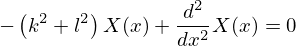

In [2]:
X = Function('X',real=True)
k, l = symbols('k l',positive=True)
f1_ode = Eq(Derivative(X(x), x, 2) - (k**2+l**2)*X(x))
f1_ode

In [3]:
sol1 = dsolve(f1_ode, X(x))
sol1

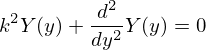

In [4]:
Y = Function('Y',real=True)
f2_ode = Eq(Derivative(Y(y), y, 2) + k**2*Y(y))
f2_ode

In [5]:
sol2 = dsolve(f2_ode, Y(y))
sol2

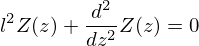

In [6]:
Z = Function('Z',real=True)
f3_ode = Eq(Derivative(Z(z), z, 2) + l**2*Z(z))
f3_ode

In [7]:
sol3 = dsolve(f3_ode, Z(z))
sol3

From boundary conditions (except (6)) we get:

$$V(x,y,z)=C\textrm{e}^{-\pi \sqrt{(n/a)^2+(m/b)^2}x} \sin{(n\pi y/a)} \sin{(m\pi z/b)}$$

with

$$ k = \frac{n\pi}{a},\ l=\frac{m\pi}{b}$$

which we can use to define a double sum for all possible $V_0(y,z)$

$$ V(x,y,z)= \sum_{n=1}^{\infty}\sum_{m=1}^{\infty} C_{n,m}\textrm{e}^{-\pi \sqrt{(n/a)^2+(m/b)^2}x} \sin{(n\pi y/a)} \sin{(m\pi z/b)} $$

and get the coefficients $C_{n,m}$ from BC (6)

$$ V(0,y,z)= \sum_{n=1}^{\infty}\sum_{m=1}^{\infty} C_{n,m} \underbrace{\textrm{e}^{-\pi \sqrt{(n/a)^2+(m/b)^2}x}}_{=1 \textrm{ for }x=0} \sin{(n\pi y/a)} \sin{(m\pi z/b)} = V_0(y,z)$$

using the same approach again and multiplying with:

$$ \sin{(n'\pi y/a)} \sin{(m'\pi z/b)}$$

and integrating from 0 to $a$ and 0 to $b$:

$$ \sum_{n=1}^{\infty}\sum_{m=1}^{\infty} C_{n,m} \int_0^a \sin{(n\pi y/a)} \sin{(n'\pi y/b)}\,dy \int_0^b \sin{(m\pi z/a)} \sin{(m'\pi z/b)}\,dz  = \int_0^a \int_0^b V_0 \sin{(n'\pi y/a)} \sin{(m'\pi z/b)}\,dydz$$

solving the integrals on the left side:

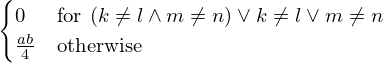

In [8]:
from sympy import integrate, pi
n, m, k, l = symbols('n m k l', positive = True, integer=True)
a, b = symbols('a b', constant = True)
integrate(integrate(sin(n*pi*y/a)*sin(m*pi*y/a)*sin(k*pi*z/b)*sin(l*pi*z/b), (y, 0, a)), (z, 0, b)) # var y, from 0 to a

we get for $C_{n,m}$:

$$ C_{n,m} = \frac{4}{ab} \int_0^a \int_0^b V_0(y,z) \sin{(n\pi y/a)} \sin{(m\pi z/b)}\,dydz$$

Example: $V_0(y,z)$ is constant:

$$ C_{n,m} = \frac{4V_0}{ab} \int_0^a \int_0^b \sin{(n\pi y/a)} \sin{(m\pi z/b)}\,dydz = \begin{cases}
    0, & \text{if $n$ or $m$ is even}.\\
    \frac{16V_0}{nm\pi^2}, & \text{if $n$ is odd}.
\end{cases}$$

and thus:

$$ V(x,y,z)= \frac{16 V_0}{\pi^2} \sum_{n,m=1,3,5,\ldots}^{\infty} \frac{1}{nm}\textrm{e}^{-\pi \sqrt{(n/a)^2+(m/b)^2}x} \sin{(n\pi y/a)} \sin{(m\pi z/b)} $$

<IPython.core.display.Javascript object>


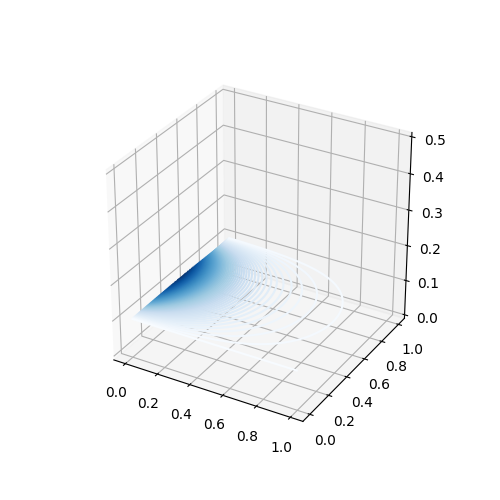

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5.,5.))
ax = fig.gca(projection='3d')

n=1
m=1
a=1
b=1
V0 = 1
x = np.arange(0,1.01,0.01)  # range for x
y = np.arange(0,a+0.01,0.01)  # range for y
#z = np.arange(0,b+0.01,0.01)
X,Y = np.meshgrid(x,y)  # generate 2D mesh from x and y
Z=.1
V=(16*V0/np.pi**2)*(1/(n*m)*np.exp(-np.pi*np.sqrt((n/a)**2+(m/b)**2)*x)*np.sin(n*np.pi*Y/a)*np.sin(m*np.pi*Z/b))  # define V(x,y) on the mesh X,Y

# Plot a crossection
cset = ax.contour3D(X, Y, V, zdir='z', offset=.1, cmap='Blues',levels=64) # lineplot on the xz plane
ann = ax.text(.7,.8,1, "n={}".format(n), color='k',fontsize=24) 